In [487]:
#initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.visualization import plot_histogram

In [488]:
qr = QuantumRegister(4)
cr = ClassicalRegister(4)
aux = QuantumRegister(1)
groverCircuit = QuantumCircuit(qr,cr, aux)

In [489]:
groverCircuit.h(qr)
groverCircuit.barrier(qr)

In [490]:
# groverCircuit.x(qr[0])
groverCircuit.mct(qr[0:3], qr[3], aux)
# groverCircuit.x(qr[0])


In [491]:

for i in range(5):
#     if i == 0:
    groverCircuit.h(qr)
    groverCircuit.x(qr)
    groverCircuit.barrier(qr)
    groverCircuit.mct(qr[0:3], qr[3], aux)
    groverCircuit.x(qr)
    groverCircuit.h(qr)
    
# groverCircuit.x(qr)
# groverCircuit.h(qr)
groverCircuit.barrier(qr)



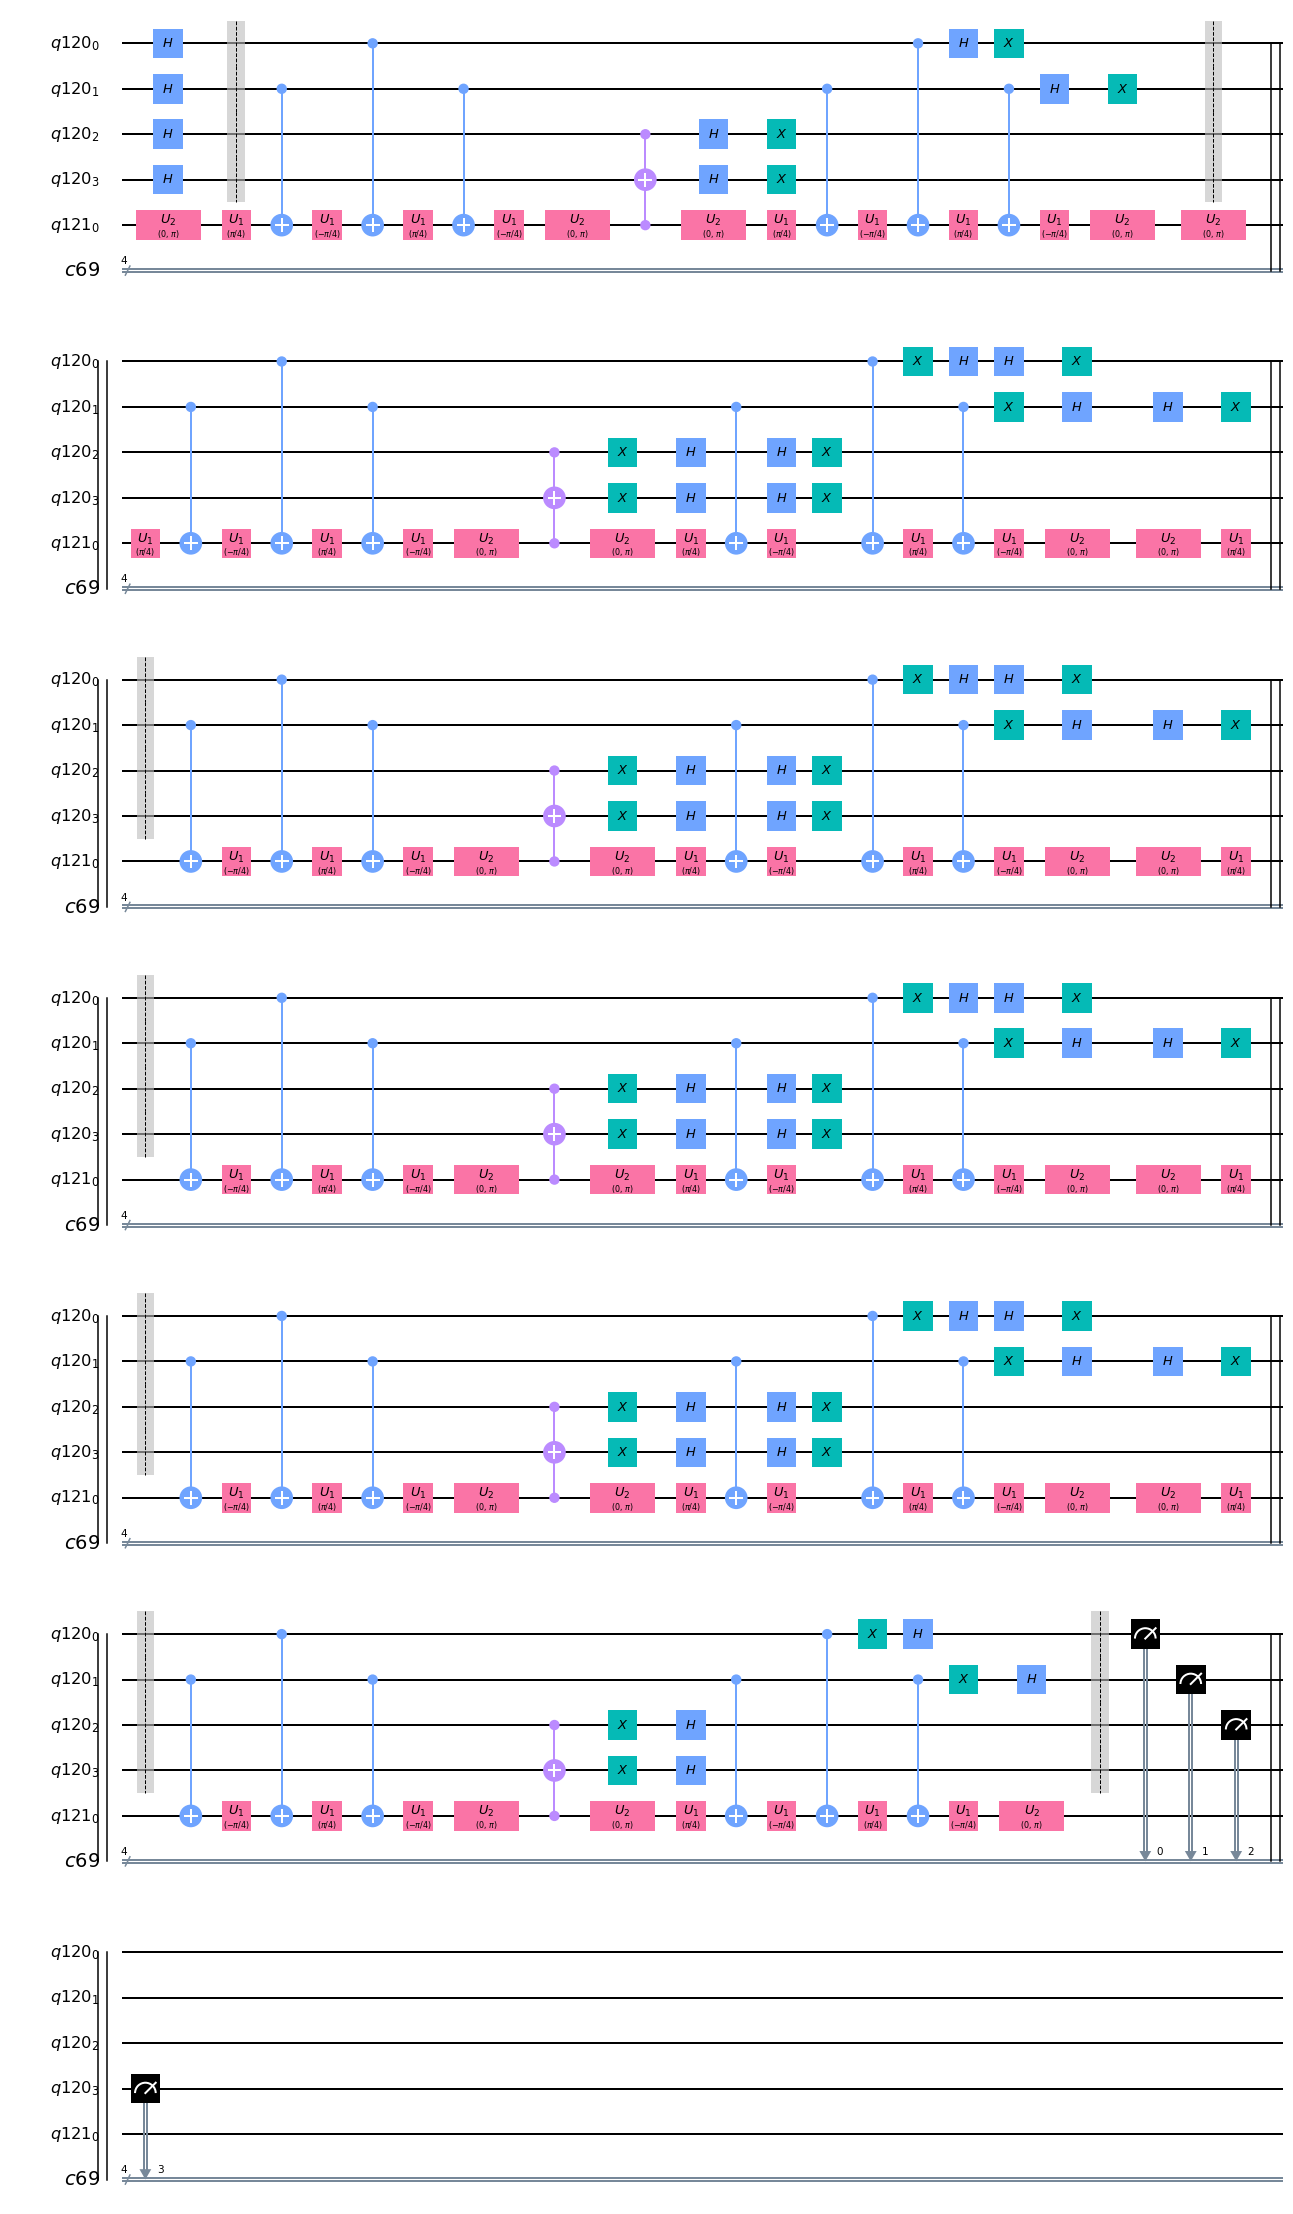

In [495]:
groverCircuit.draw(output="mpl")

In [493]:
backend_sim = Aer.get_backend('statevector_simulator')
job_sim = execute(groverCircuit, backend_sim)
statevec = job_sim.result().get_statevector()
print(statevec)

[ 0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j
  0.25+0.j -0.25+0.j -0.25+0.j -0.25+0.j -0.25+0.j -0.25+0.j -0.25+0.j
 -0.25+0.j -0.25+0.j  0.  +0.j  0.  +0.j  0.  +0.j  0.  +0.j  0.  +0.j
  0.  +0.j  0.  +0.j  0.  +0.j  0.  +0.j  0.  +0.j  0.  +0.j  0.  +0.j
  0.  +0.j  0.  +0.j  0.  +0.j  0.  +0.j]


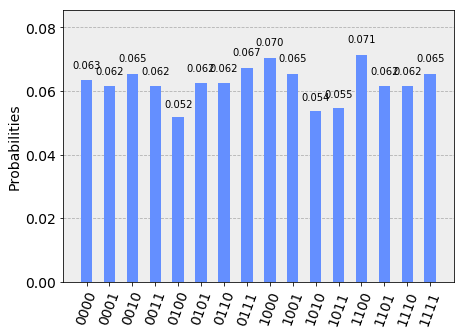

In [494]:
groverCircuit.measure(qr,cr)

backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(groverCircuit, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

In [289]:
# Load IBM Q account and get the least busy backend device
provider = IBMQ.load_account()
device = least_busy(provider.backends(simulator=False))
print("Running on current least busy device: ", device)

d:\anaconda3\envs\tensorflow-gpu\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:181: UserWarning: Credentials are already in use. The existing account in the session will be replaced.
  warnings.warn('Credentials are already in use. The existing '


Running on current least busy device:  ibmqx2


In [290]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor
job = execute(groverCircuit, backend=device, shots=1024, max_credits=10)
job_monitor(job, interval = 2)

Job Status: job has successfully run


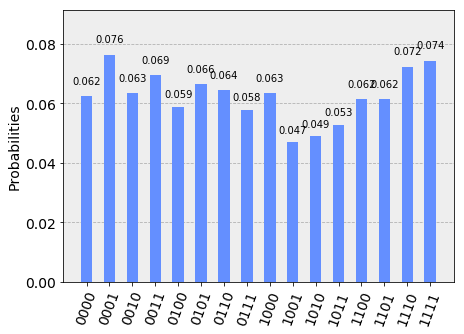

In [291]:
# Get the results from the computation
results = job.result()
answer = results.get_counts(groverCircuit)
plot_histogram(answer)